<a href="https://colab.research.google.com/github/keivanB/Clarkson_Finger_Segment/blob/main/Clarkson_Fingerprint_Segmentaition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 41.5 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.4.0 which is incompatible.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.5 which is incompatible.
yellowbrick 1.3.post1 requires numpy<1.20,

In [ ]:
!git clone https://github.com/keivanB/Clarkson_Finger_Segment

Cloning into 'Clarkson_Finger_Segment'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 50 (delta 24), reused 34 (delta 20), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kw_W7WZJoXjH-eYylycOaUNJ7UN2k6pA' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kw_W7WZJoXjH-eYylycOaUNJ7UN2k6pA" -O /content/Clarkson_Finger_Segment/trained.model/trained.CFSEG.h5 && rm -rf /tmp/cookies.txt

--2022-01-05 20:29:21--  https://docs.google.com/uc?export=download&confirm=yUPp&id=1kw_W7WZJoXjH-eYylycOaUNJ7UN2k6pA
Resolving docs.google.com (docs.google.com)... 142.250.136.100, 142.250.136.102, 142.250.136.139, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/5l6l83hnrai4fju22h3l1rjvppacboln/8h4bq60hbpngfsug78lbej7ppqipfh7d/1641414525000/12882544058832932860/10267059149006522727Z/1kw_W7WZJoXjH-eYylycOaUNJ7UN2k6pA?e=download [following]
--2022-01-05 20:29:21--  https://doc-0s-bc-docs.googleusercontent.com/docs/securesc/5l6l83hnrai4fju22h3l1rjvppacboln/8h4bq60hbpngfsug78lbej7ppqipfh7d/1641414525000/12882544058832932860/10267059149006522727Z/1kw_W7WZJoXjH-eYylycOaUNJ7UN2k6pA?e=download
Resolving doc-0s-bc-docs.googleusercontent.com (doc-0s-bc-docs.googleusercontent.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Conne

In [ ]:
import os
import sys
sys.path.append('/content/Clarkson_Finger_Segment/helper') # locaition of the helper functions

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from config import Config
import model as MaskRCNN
import visualize
import model as modellib, utils

Using TensorFlow backend.


In [ ]:
# helper functions
class myMaskRCNNConfig(Config):
    # give the configuration a recognizable name
    NAME = "MaskRCNN_config"
 
    # set the number of GPUs to use along with the number of images
    # per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
 
    # number of classes (we would normally add +1 for the background)
    # kangaroo + BG
    NUM_CLASSES = 1+10
   
    # Number of training steps per epoch
    STEPS_PER_EPOCH = 8750 #(tatal train images 8750 divided by batch_size)
    
    # Learning rate
    LEARNING_RATE=0.001
    
    # Skip detections with < 80% confidence
    DETECTION_MIN_CONFIDENCE = 0.7
    
    # setting Max ground truth instances
    MAX_GT_INSTANCES=10

def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
# setting the config for inference
config = myMaskRCNNConfig()
#config.display()

In [ ]:
#Loading the model in the inference mode
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
# model = modellib.MaskRCNN(mode="inference", config=config, model_dir='/content')
model_path = '/content/Clarkson_Finger_Segment/trained.model/trained.CFSEG.h5' 
# loading the trained weights
model.load_weights(model_path, by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Processing 1 images
image                    shape: (1500, 1600, 3)       min:    2.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

[1 3 4 2 6]


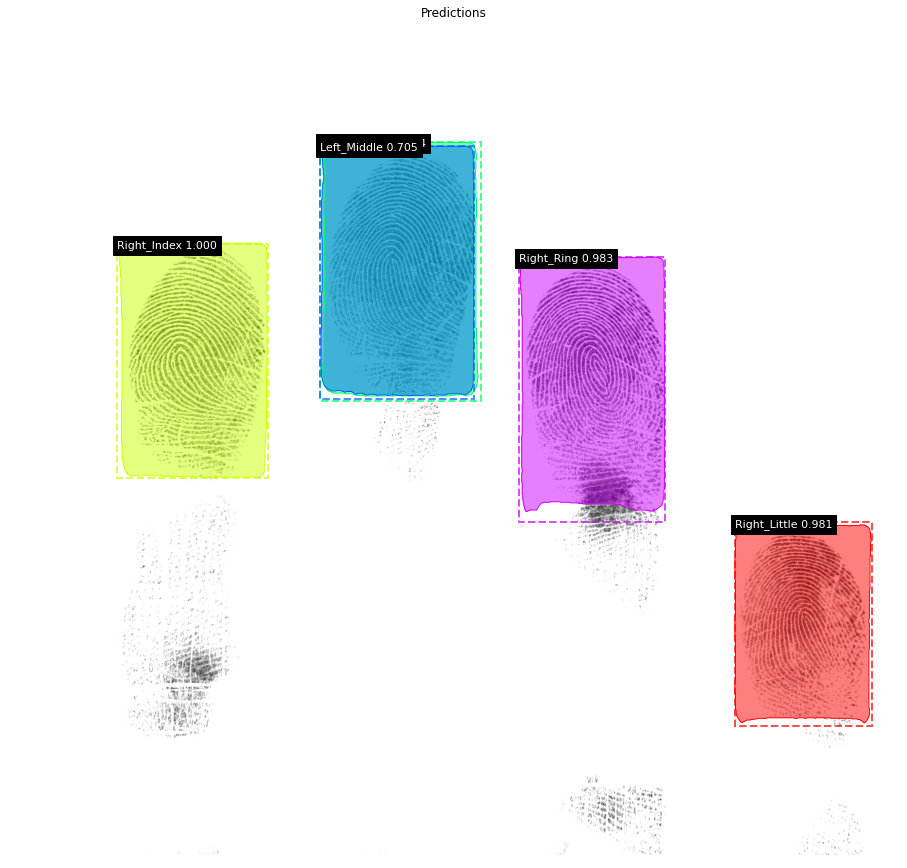

In [ ]:
input_img = "/content/Clarkson_Finger_Segment/test.image/Image_00_1_1.bmp"

image = load_img(input_img)
image = img_to_array(image)
class_names = ['BG', 'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 'Right_Thumb', 'Left_Thumb']

# Run object detection
results = model.detect([image], verbose=1)

r = results[0]
print(r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],
                            title="Predictions", ax=get_ax(1))

Processing 1 images
image                    shape: (1500, 1600, 3)       min:    3.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 2 3 4]


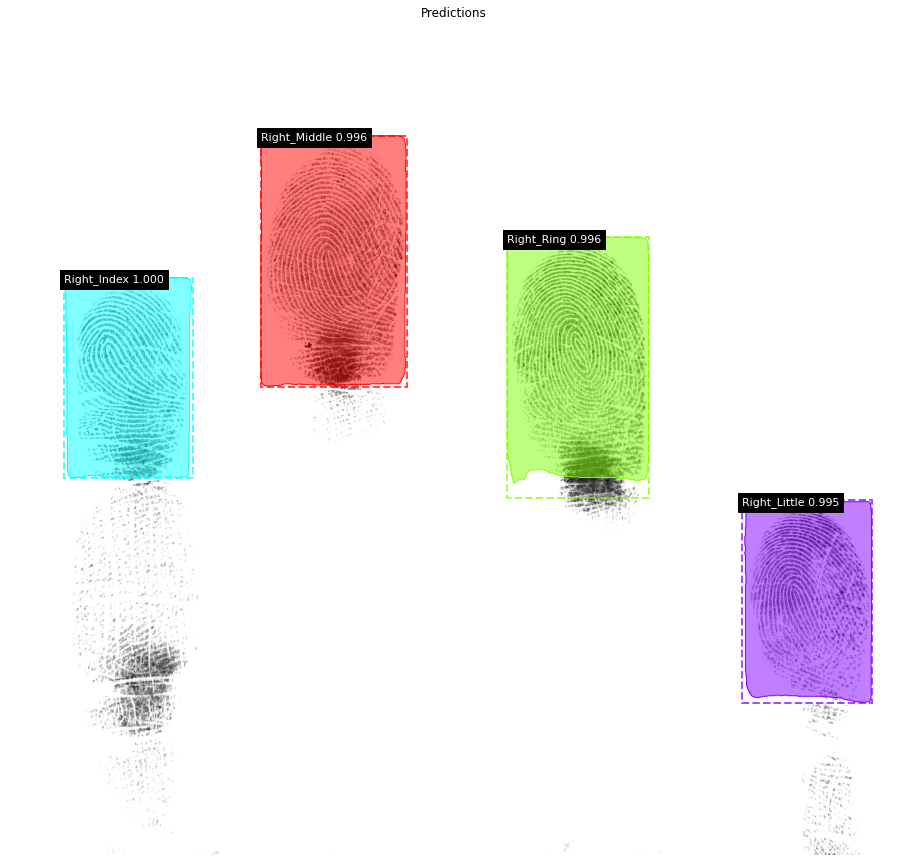

In [ ]:
input_img = "/content/Clarkson_Finger_Segment/test.image/Image_00_1_2.bmp"

image = load_img(input_img)
image = img_to_array(image)
class_names = ['BG', 'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 'Right_Thumb', 'Left_Thumb']

# Run object detection
results = model.detect([image], verbose=1)

r = results[0]
print(r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],
                            title="Predictions", ax=get_ax(1))

Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 4 2 5 3]


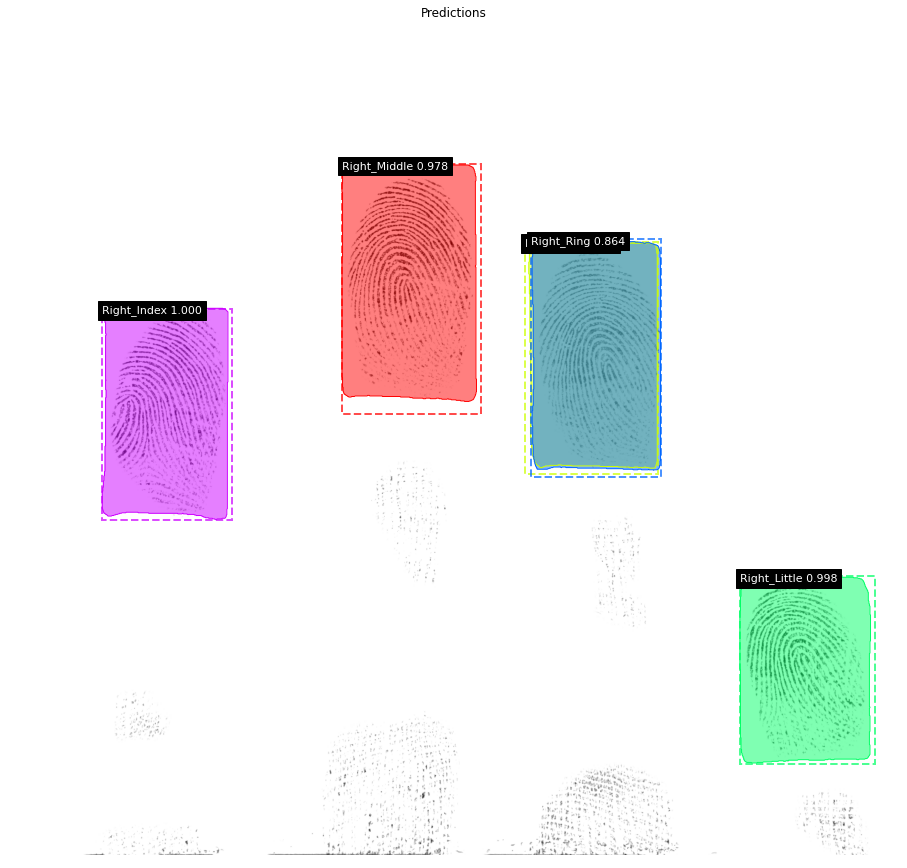

In [ ]:
input_img = "/content/Clarkson_Finger_Segment/test.image/Image_00_2_1.bmp"

image = load_img(input_img)
image = img_to_array(image)
class_names = ['BG', 'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 'Right_Thumb', 'Left_Thumb']

# Run object detection
results = model.detect([image], verbose=1)

r = results[0]
print(r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],
                            title="Predictions", ax=get_ax(1))

Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[1 2 4 3 1]


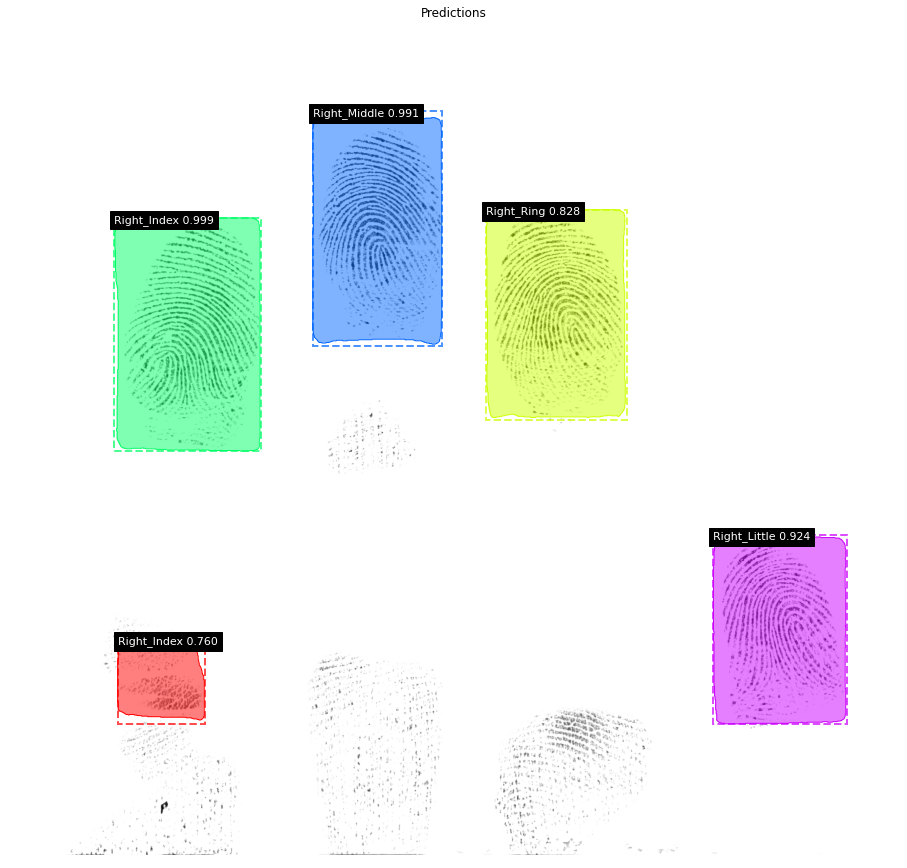

In [ ]:
input_img = "/content/Clarkson_Finger_Segment/test.image/Image_00_2_2.bmp"

image = load_img(input_img)
image = img_to_array(image)
class_names = ['BG', 'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 'Right_Thumb', 'Left_Thumb']

# Run object detection
results = model.detect([image], verbose=1)

r = results[0]
print(r['class_ids'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'],
                            title="Predictions", ax=get_ax(1))

image name:  Image_01_3_2.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_01_1_1.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    1.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_00_3_2.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


image name:  Image_02_1_1.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_01_3_1.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    2.00000  max:  255.00000  float32
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
image name:  Image_02_3_1.bmp
Processing 1 images
image                    shape: (1500, 1600, 3)       min:    0.00000  max:  255.0

<Figure size 432x288 with 0 Axes>

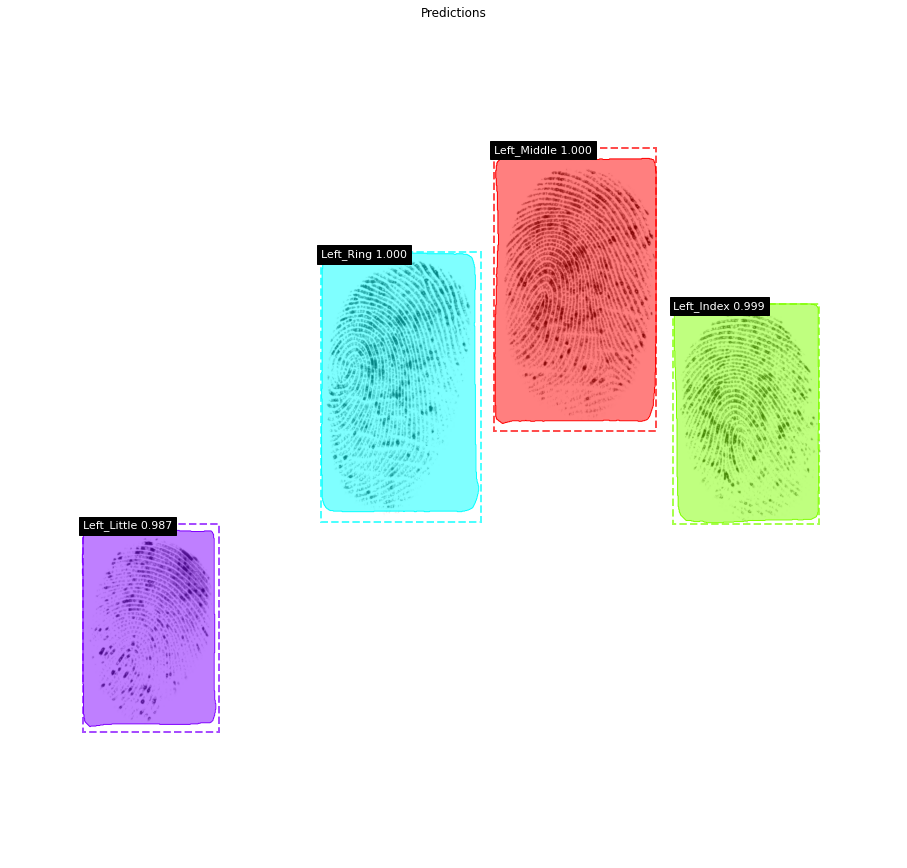

<Figure size 432x288 with 0 Axes>

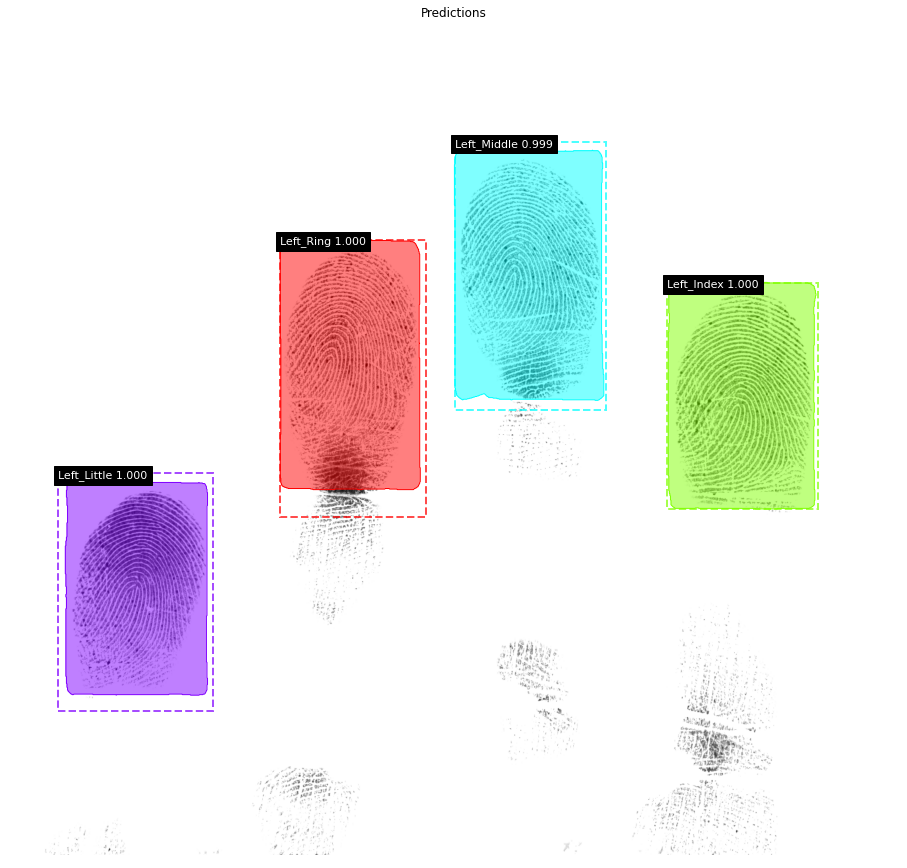

<Figure size 432x288 with 0 Axes>

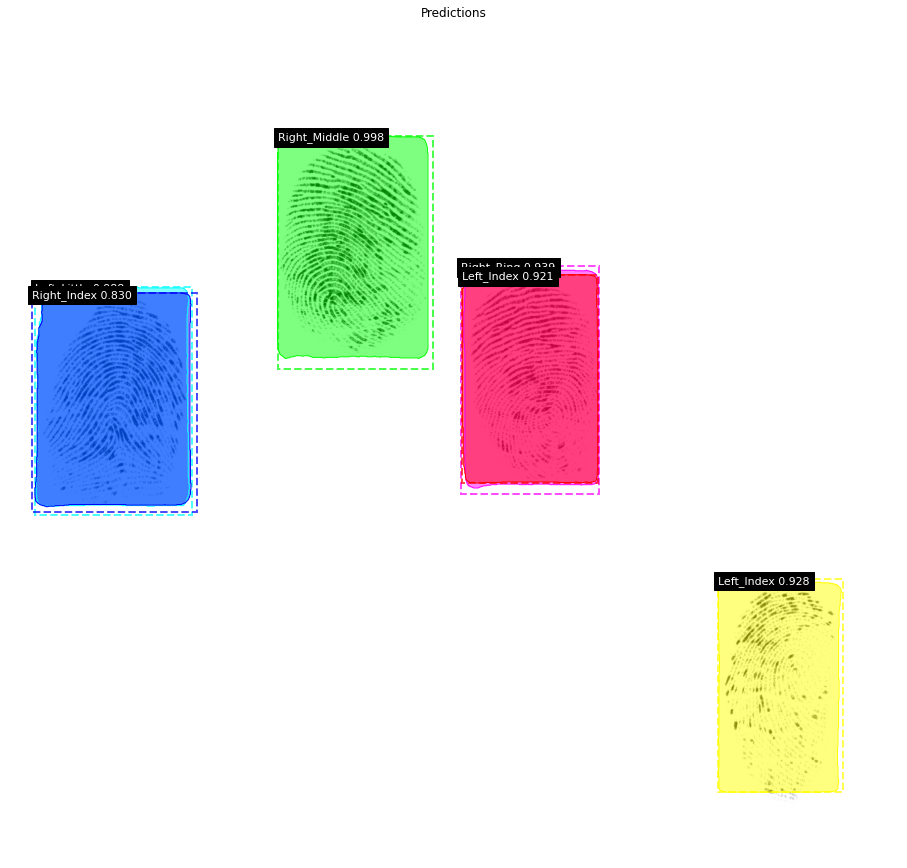

<Figure size 432x288 with 0 Axes>

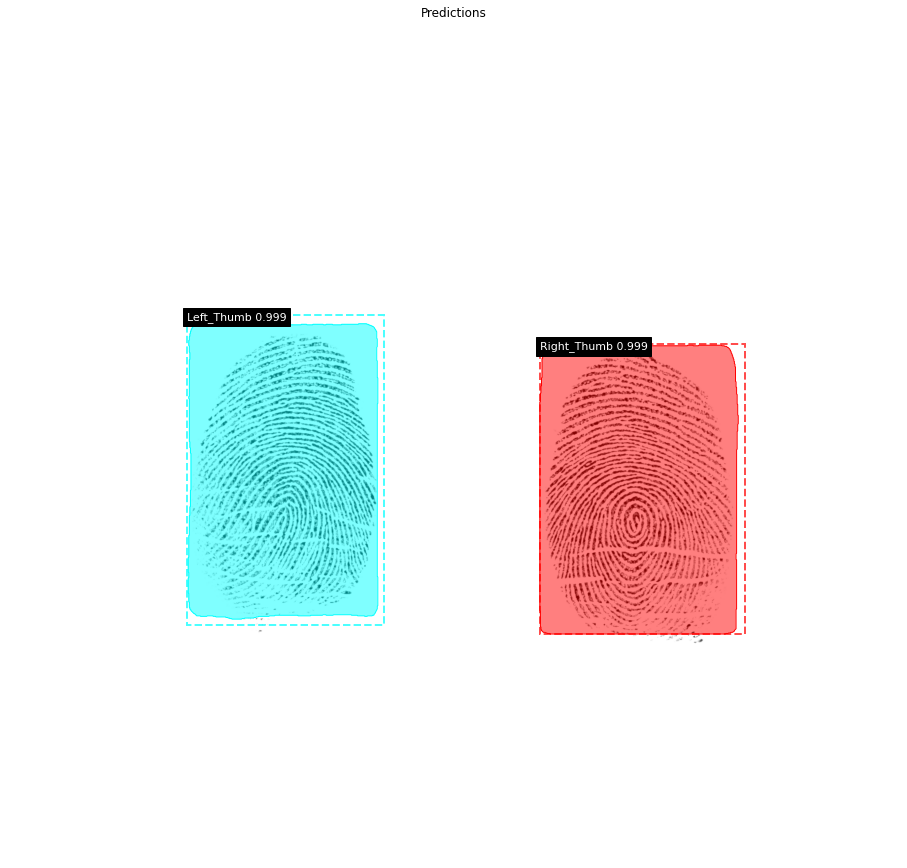

<Figure size 432x288 with 0 Axes>

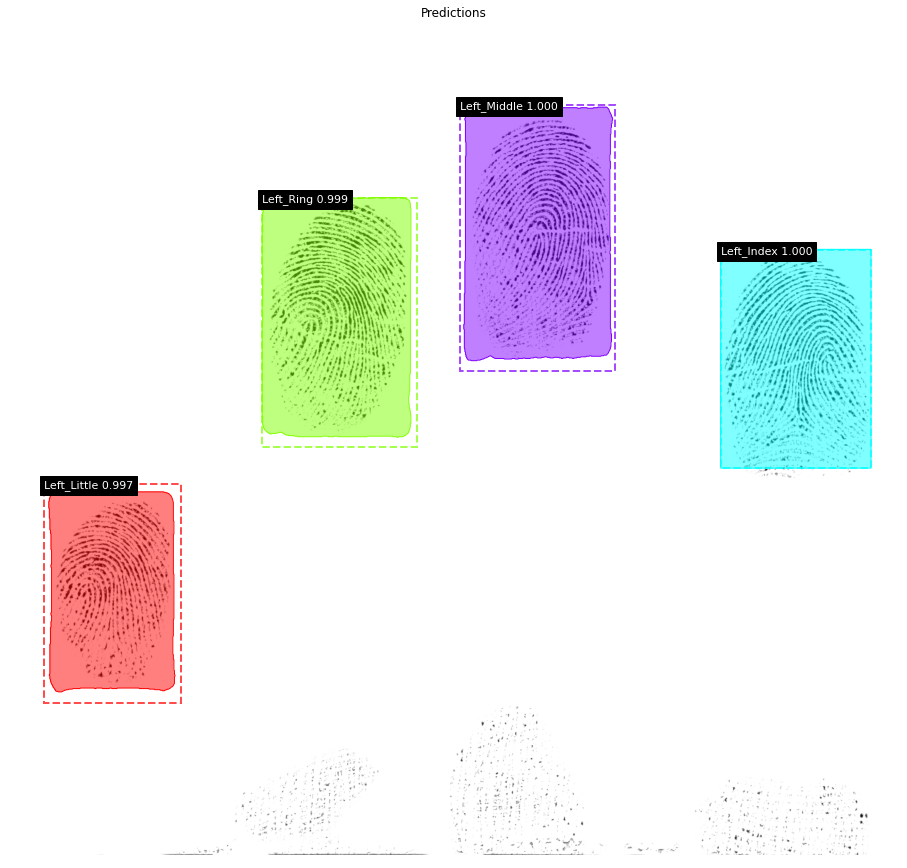

<Figure size 432x288 with 0 Axes>

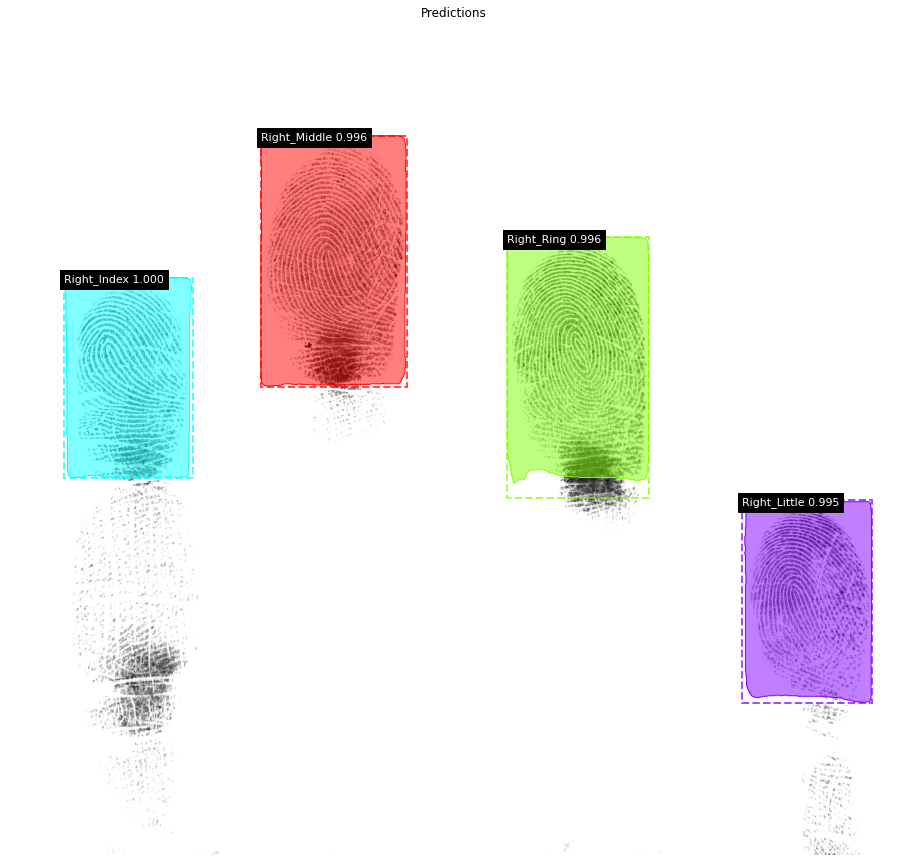

<Figure size 432x288 with 0 Axes>

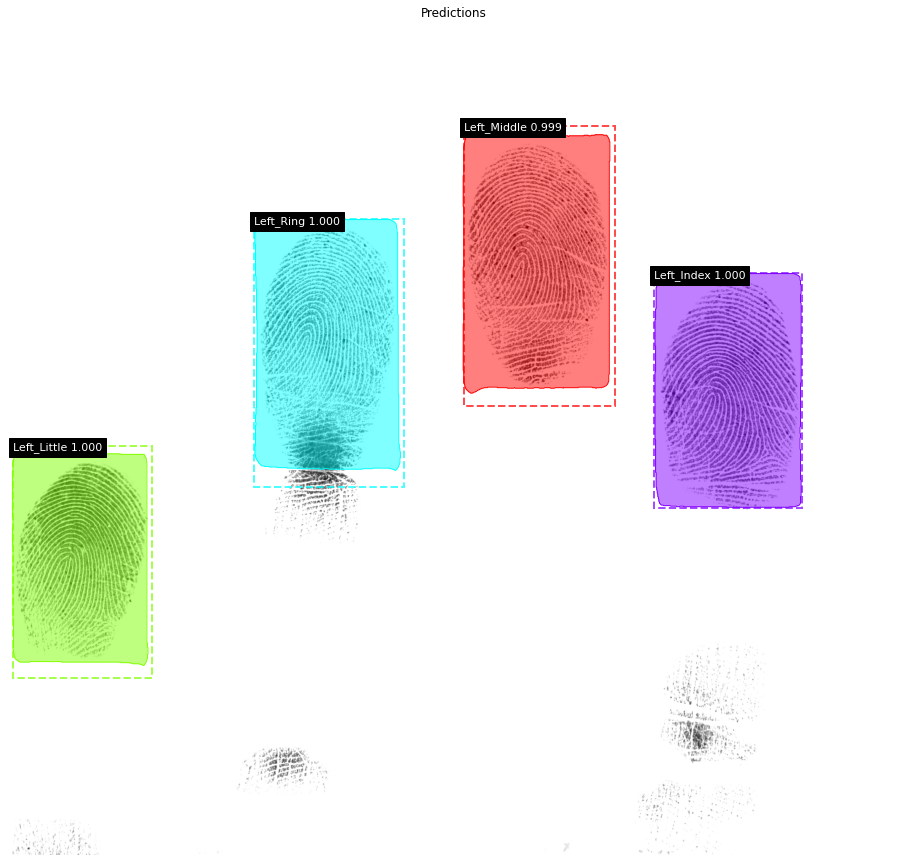

<Figure size 432x288 with 0 Axes>

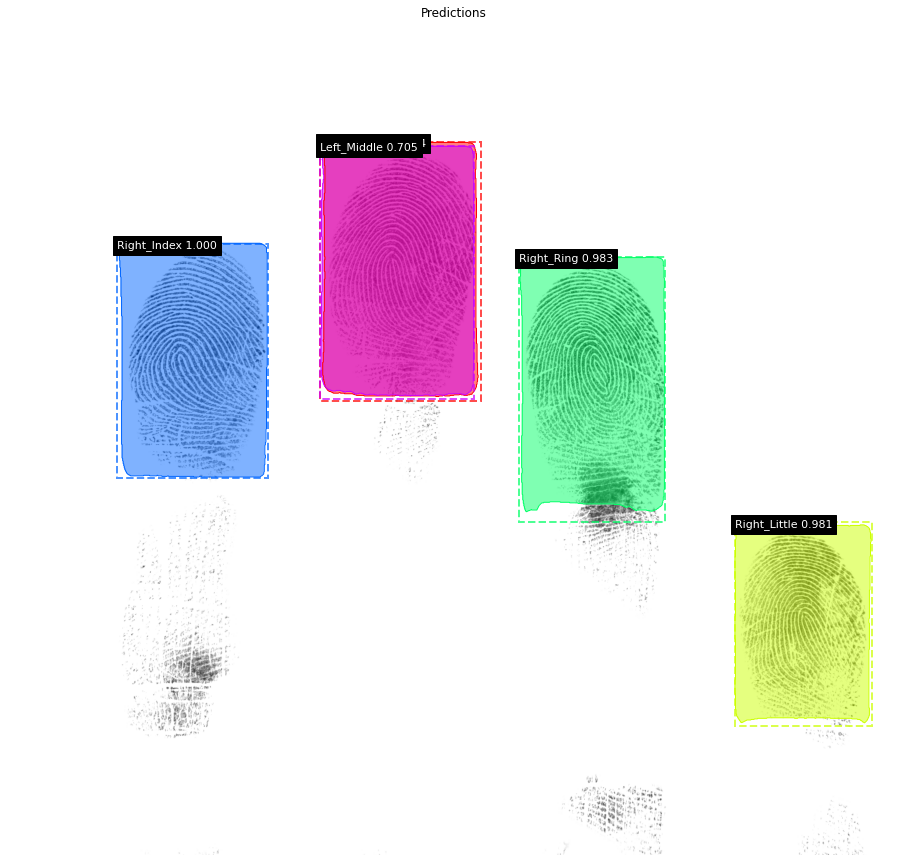

<Figure size 432x288 with 0 Axes>

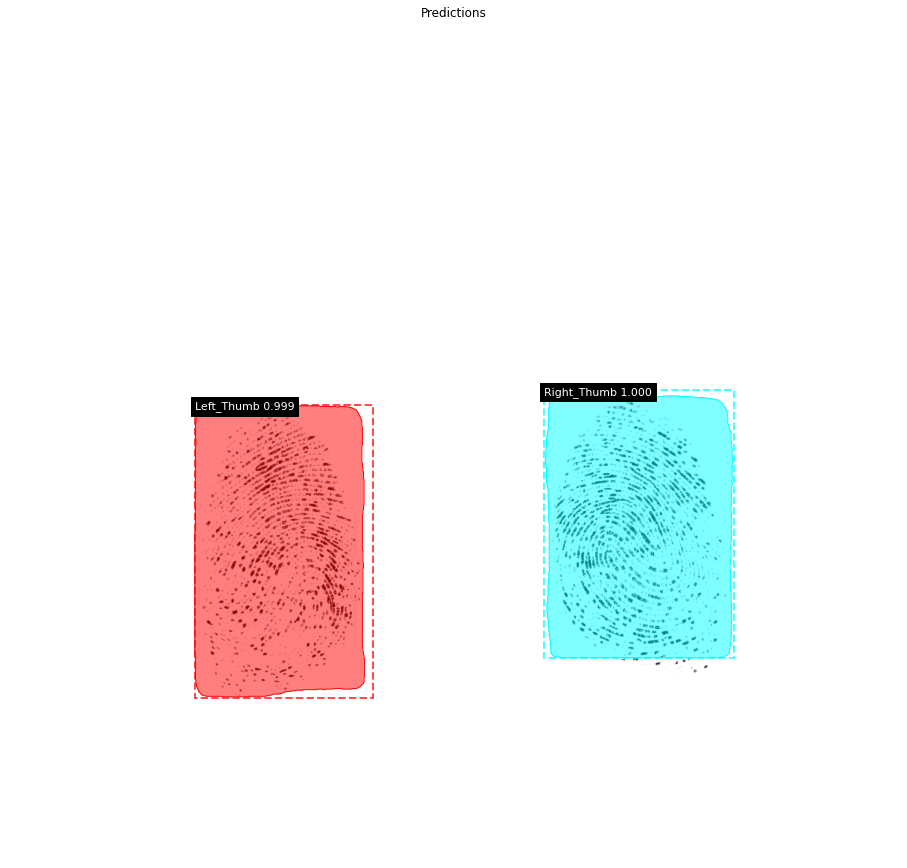

<Figure size 432x288 with 0 Axes>

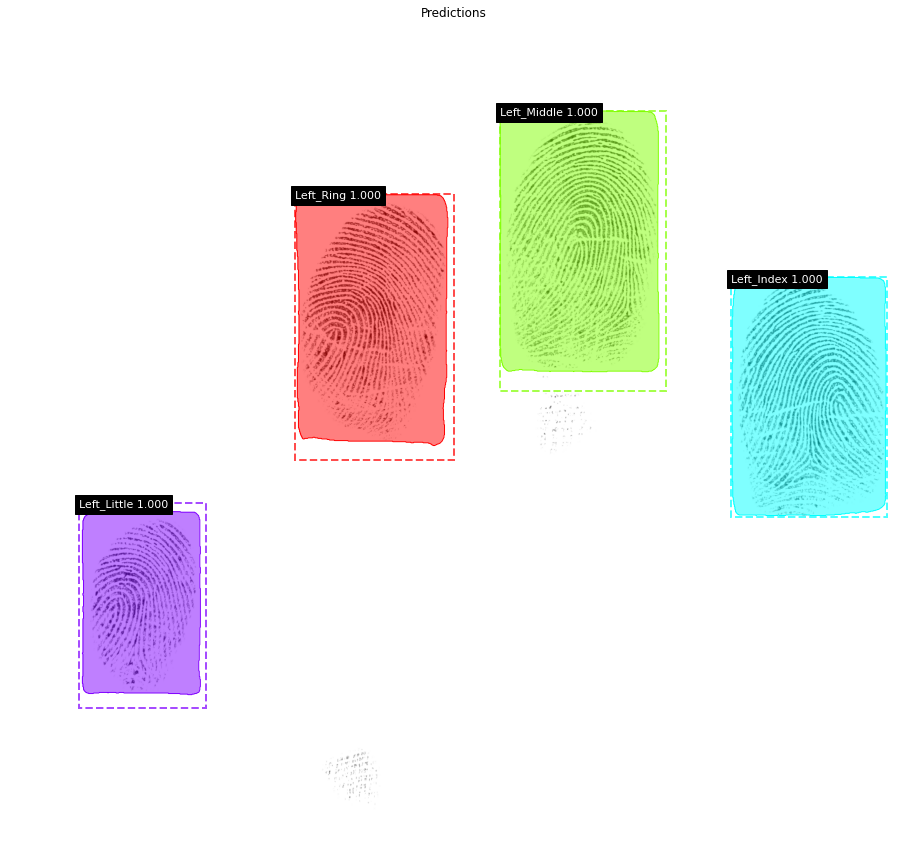

<Figure size 432x288 with 0 Axes>

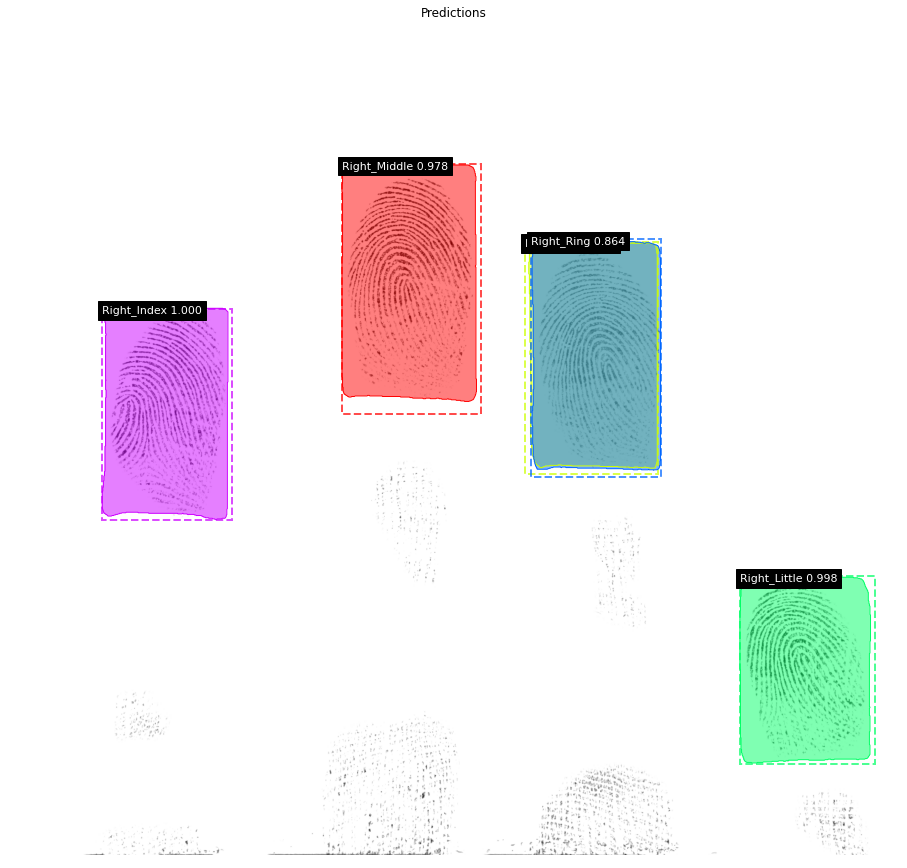

<Figure size 432x288 with 0 Axes>

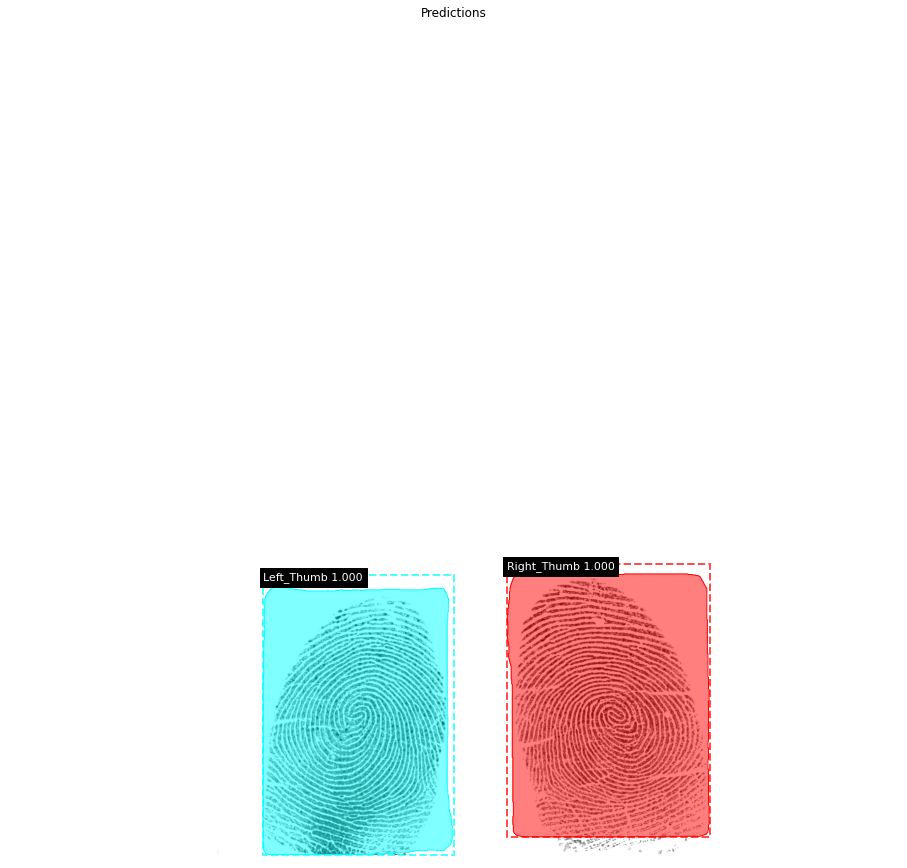

<Figure size 432x288 with 0 Axes>

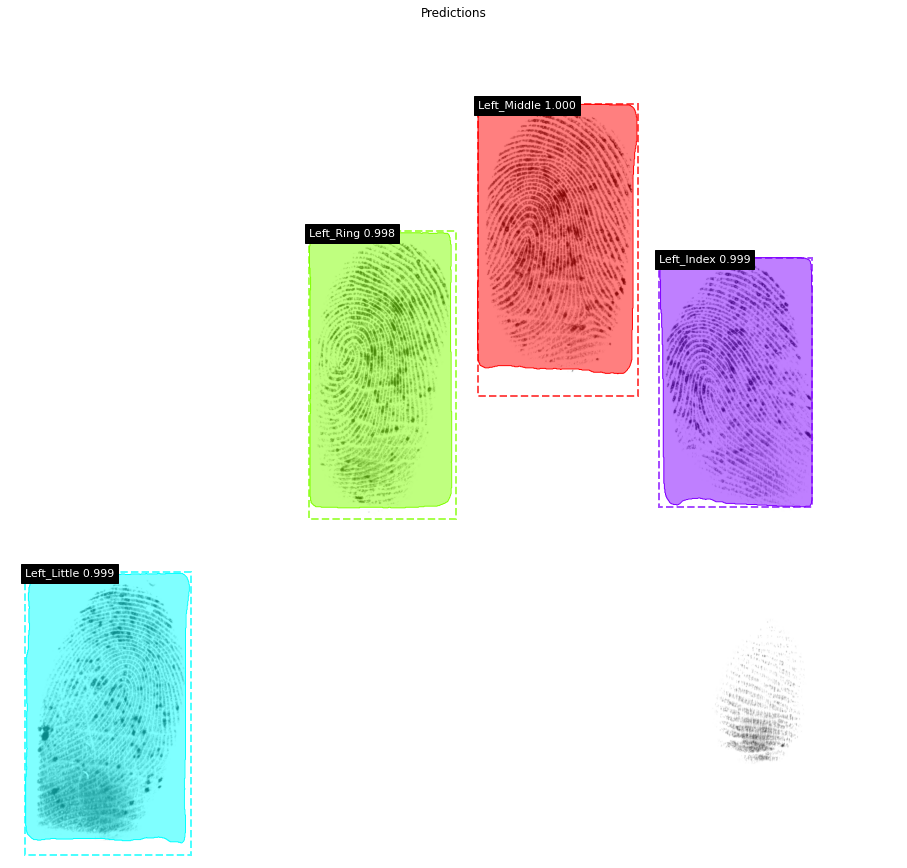

<Figure size 432x288 with 0 Axes>

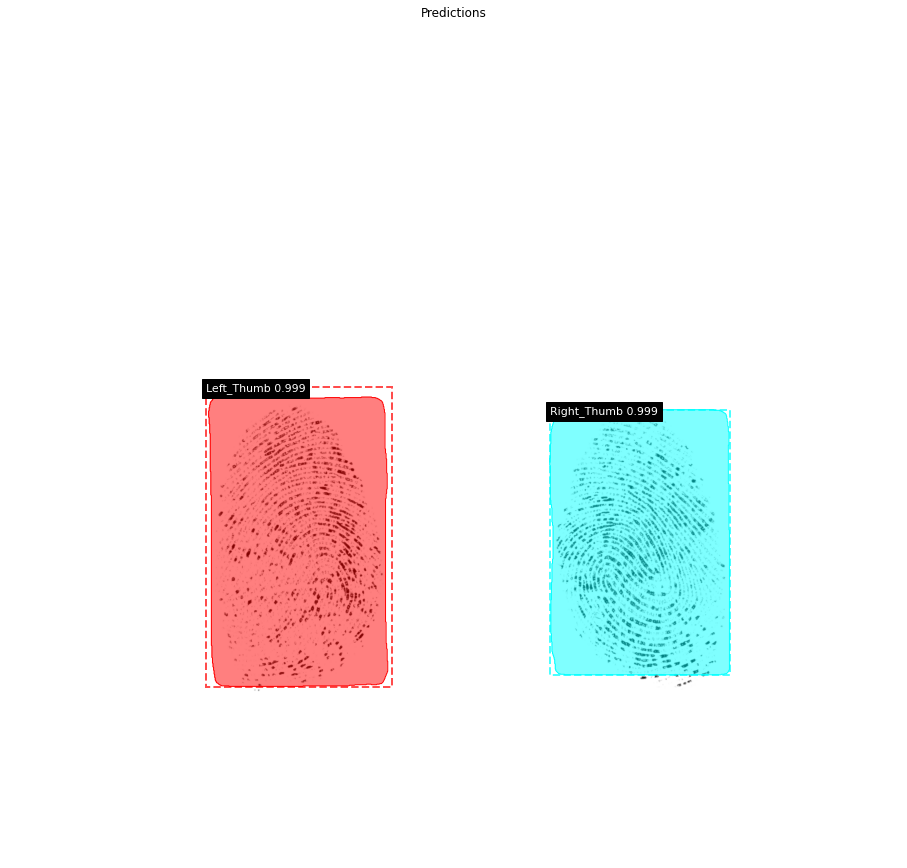

<Figure size 432x288 with 0 Axes>

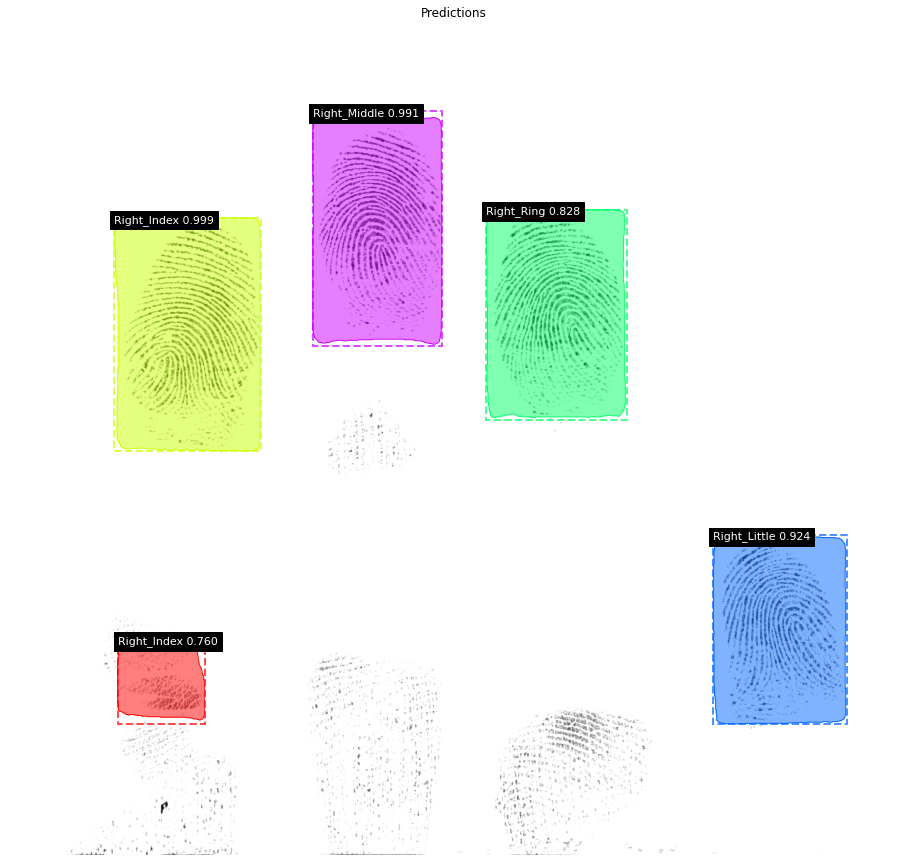

<Figure size 432x288 with 0 Axes>

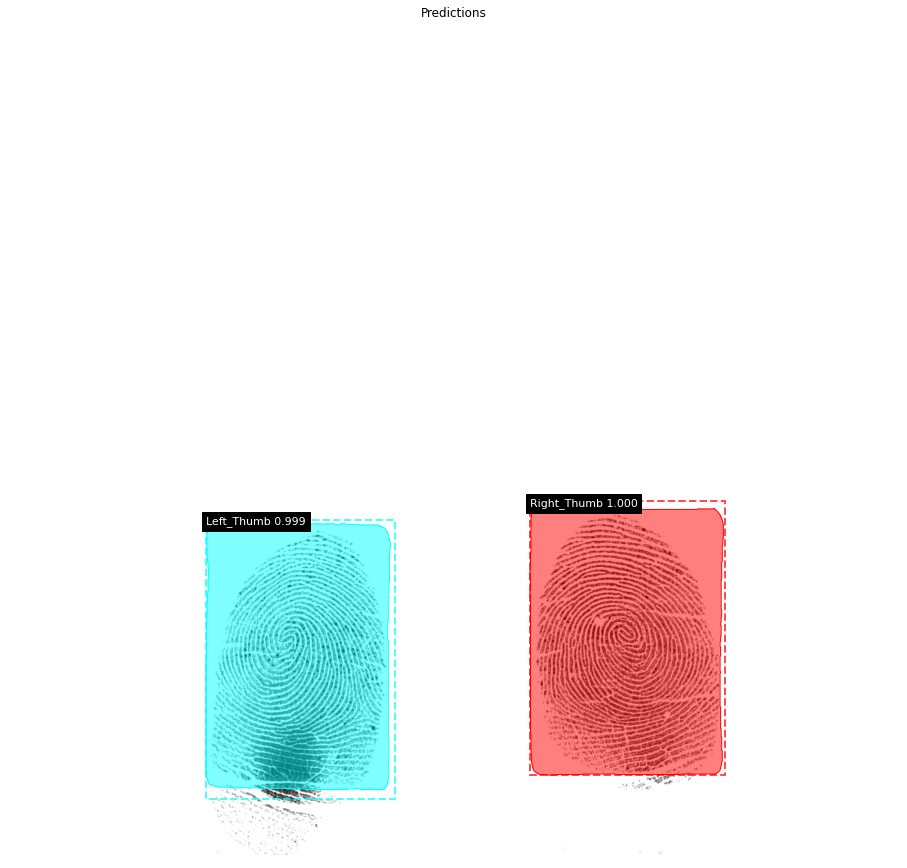

<Figure size 432x288 with 0 Axes>

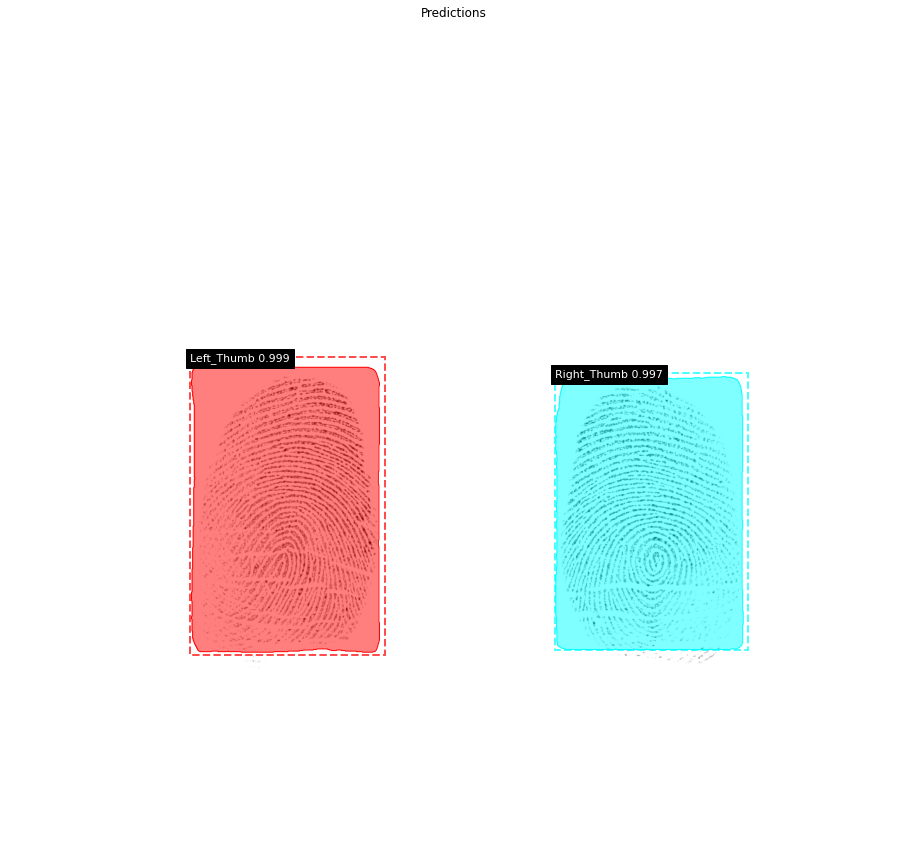

In [ ]:
imgs_location = "/content/Clarkson_Finger_Segment/test.image/"
input_img = os.listdir(imgs_location)
# print(input_img)
for img in input_img:
    print("image name: " ,img)
    image = load_img(imgs_location+img)
    image = img_to_array(image)
    class_names = ['BG', 
                   'Right_Index', 'Right_Middle', 'Right_Ring', 'Right_Little', 
                   'Left_Index', 'Left_Middle', 'Left_Ring', 'Left_Little', 
                   'Right_Thumb', 'Left_Thumb']

    # Run object detection
    results = model.detect([image], verbose=1)
    #print("results: " ,results)
    # Display results
    # a = model.keras_model.evaluate([image], verbose=1)

    r = results[0]
#     print(results[0].get("rois"))
#     print(results[0].get("class_ids"))
#     print(results[0].get("scores"))

    #print("results: " , r)
    #find_best_result_index(r)
    plt.figure()
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'],
                                title="Predictions", ax=get_ax(1))